In [10]:
import xarray as xr
import inspect
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.util as cutil
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

month = [1,2,3,4,5,6,7,8,9,10,11,12]
prateyear = xr.DataArray()
#month10dy = xr.DataArray(np.zeros((3,94,192))) # ループの中でやらないとどんどん増える


# prate.sfc.gauss.XXXX.nc読み込み、１０日毎に単純平均を取ったらバイナリファイルprate10dy.datに保存
# 他にdlwrf,lhtfl,shtfl,ulwrf,uflx,uswrf,vflxがある
# lhtflは次のFreshWaterFlux作成でも使う
with open('prate10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        pratenc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/prate.sfc.gauss.'+str(year)+'.nc' # ncファイルはすべてlat94,lon192,Time365

        pratenc = xr.open_dataset(pratenc)['prate'].load() # パタメータ名はファイルから読める。load()は配列をメモリに一度全部読み込む

    
        #dlwrf = np.empty([366,94,192]) # 10日区切りを保存する変数、命名は上と同じくファイルから読むべき
        for x in month:
        # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = pratenc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = pratenc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = pratenc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）

            prateyear = month10dy[3:] # 最初の3つは0なので消しておく

# どんどん遅くなるので一旦バイナリファイルとして保存
# 最後の4つが空列になってる?
        prateyear.tofile(f)
#        from IPython.core.debugger import Pdb; Pdb().set_trace()


print('end')


end


In [11]:
prate = np.fromfile('prate10dy.dat').reshape(2664,94,192)


In [13]:
# 要素削除とガベージコレクター
import gc

del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del month10dy,pratenc,prateyear,temp

gc.collect()

NameError: name 'data_mean_10dy1' is not defined

In [14]:
# 上と同様にlhtfl.sfc.gauss.XXXX.ncを読み込んでバイナリファイルlhtfl10dy.datに保存
lhtflyear = xr.DataArray()
with open('lhtfl10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        lhtflnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/lhtfl.sfc.gauss.'+str(year)+'.nc'
        lhtflnc = xr.open_dataset(lhtflnc)['lhtfl'].load()
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = lhtflnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = lhtflnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = lhtflnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）

            lhtflyear = month10dy[3:] # 最初の3つは0なので消しておく
# どんどん遅くなるので一旦バイナリファイルとして保存
# インデント注意
        lhtflyear.tofile(f)


print ('end')

end


In [4]:
# gabage collcter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del lhtflyear
del month10dy,temp
gc.collect()

432

In [5]:
# dswrf.sfc.gauss.XXXX.ncを読み込んで１０日平均を取ってバイナリファイルに一度保存
dswrfyear = dlwrfyear = uswrfyear = ulwrfyear = shtflyear = uflxyear = vflxyear = xr.DataArray()
with open('dswrf10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        dswrfnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/dswrf.sfc.gauss.'+str(year)+'.nc'
        dswrfnc = xr.open_dataset(dswrfnc)['dswrf'].load()
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = dswrfnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = dswrfnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = dswrfnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            dswrfyear= month10dy[3:] # 最初の3つは0なので消しておく
        dswrfyear.tofile(f)

print('end')

end


In [6]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del dswrfyear
del month10dy,temp
gc.collect()

420

In [7]:
# dlwrf.sfc.gauss.XXXX.ncファイルを読んで１０日平均を取ってバイナリファイルに保存
with open('dlwrf10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        dlwrfnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/dlwrf.sfc.gauss.'+str(year)+'.nc'
        dlwrfnc = xr.open_dataset(dlwrfnc)['dlwrf'].load()
    
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = dlwrfnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = dlwrfnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = dlwrfnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            dlwrfyear= month10dy[3:] # 最初の3つは0なので消しておく
        dlwrfyear.tofile(f)

print('end')

end


In [8]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del dlwrfyear
del month10dy,temp
gc.collect()

444

In [9]:
# ulwrf.sfc.gauss.XXXX.ncファイルを読んで１０日平均を取ってバイナリファイルに保存
with open('ulwrf10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        ulwrfnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/ulwrf.sfc.gauss.'+str(year)+'.nc'
        ulwrfnc = xr.open_dataset(ulwrfnc)['ulwrf'].load()
    
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = ulwrfnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = ulwrfnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = ulwrfnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            ulwrfyear= month10dy[3:] # 最初の3つは0なので消しておく
        ulwrfyear.tofile(f)

print('end')

end


In [10]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del ulwrfyear
del month10dy,temp
gc.collect()

60

In [11]:
# uswrf.sfc.gauss.XXXX.ncフィアルを読んで１０日平均を取ってバイナリファイルに保存
with open('uswrf10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        uswrfnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/uswrf.sfc.gauss.'+str(year)+'.nc'
        uswrfnc = xr.open_dataset(uswrfnc)['uswrf'].load()
    
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = uswrfnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = uswrfnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = uswrfnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            uswrfyear= month10dy[3:] # 最初の3つは0なので消しておく
        uswrfyear.tofile(f)

print('end')

end


In [12]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del uswrfyear
del month10dy,temp
gc.collect()

60

In [13]:
# shtfl.sfc.gauss.XXXX.ncファイルを読んで１０日平均を取ってバイナリファイルに保存
with open('shtfl10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        shtflnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/shtfl.sfc.gauss.'+str(year)+'.nc'
        shtflnc = xr.open_dataset(shtflnc)['shtfl'].load()
    
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = shtflnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = shtflnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = shtflnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            shtflyear= month10dy[3:] # 最初の3つは0なので消しておく
        shtflyear.tofile(f)

print('end')

end


In [14]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del shtflyear
del month10dy,temp
gc.collect()

72

In [15]:
# uflx.sfc.gauss.XXXX.ncファイルを読んで１０日平均を取ってバイナリファイルに保存
with open('uflx10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        uflxnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/uflx.sfc.gauss.'+str(year)+'.nc'
        uflxnc = xr.open_dataset(uflxnc)['uflx'].load()
    
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = uflxnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = uflxnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = uflxnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            uflxyear= month10dy[3:] # 最初の3つは0なので消しておく
        uflxyear.tofile(f)

print('end')

end


In [16]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del uflxyear
del month10dy,temp
gc.collect()

60

In [17]:
# vflx.sfc.gauss.XXXX.ncファイルを読んで１０日平均を取ってバイナリファイルに保存
with open('vflx10dy.dat',mode='a') as f:
    for year in range(1948,2022): # 1948-2021
        month10dy = xr.DataArray(np.zeros((3,94,192))) # コピー用の配列を初期化
        vflxnc = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/vflx.sfc.gauss.'+str(year)+'.nc'
        vflxnc = xr.open_dataset(vflxnc)['vflx'].load()
    
        for x in month:
            # 範囲指定用の文字列構成
            start1 = str(year) + '-' + str(x) + '-1'
            end1 = str(year) + '-' + str(x) + '-10'
            start2 = str(year) + '-' + str(x) + '-11'
            end2 = str(year) + '-' + str(x) + '-20'
            start3 = str(year) + '-' + str(x) + '-21'
    
            if x == 12:
                nextmonth = 1
                lastday = str(year+1) + '-' + str(nextmonth) + '-1'
            else:
                nextmonth = x + 1
                lastday = str(year) + '-' + str(nextmonth) + '-1'

            end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
            end3 = end3.strftime('%Y-%m-%d')

            # 上中下旬に分けて平均を取る（とりあえずmean重みなし）
            data_mean_10dy1 = vflxnc.loc[start1:end1].mean(dim='time')
            data_mean_10dy2 = vflxnc.loc[start2:end2].mean(dim='time')
            data_mean_10dy3 = vflxnc.loc[start3:end3].mean(dim='time')

            #月毎に10日区切りで3つ作ったら保存用の配列に代入
            temp = np.stack([data_mean_10dy1,data_mean_10dy2,data_mean_10dy3],0) # tempは1ヶ月分
            month10dy = np.append(month10dy,temp,axis=0) # 1ヶ月分のtempを順番にappendしていく（70年分）
    
            vflxncyear= month10dy[3:] # 最初の3つは0なので消しておく
        vflxncyear.tofile(f)

print('end')

end


In [18]:
# gabage collecter
del data_mean_10dy1,data_mean_10dy3,data_mean_10dy2
del vflxyear
del month10dy,temp
gc.collect()

60

In [28]:
# この時点で必要なデータ
#####
# 10日平均の9ファイル
# shapeは(36,94,192) 1ヶ月を10日区切りで
# dlwrf10dy.dat , dswrf10dy.dat , lhtfl10dy.dat
# prate10dy.dat , shtfl10dy.dat , uflx10dy.dat
# ulwrf10dy.dat , uswrf10dy.dat , vflx10dy.dat 
#####
# land.06.ft.bigファイルを読み込んだ land (94,192)
# prev_climate7902.nc2.bigを読み込んだ climate (12,94,192)



In [16]:
hoge = np.fromfile('dlwrf10dy.dat').reshape(36,94,192)


In [2]:
# 全期間を１ヶ月毎にスライスしておく
# 後ほど作画のために必要な部分
Jan = xr.DataArray(np.zeros((3,94,192)))
Feb=Mer=Apr=May=Jun=Jul=Aug=Sep=Oct=Nov=Dec = xr.DataArray(np.zeros((3,94,192)))

for i in range(70):
    if i == 0:
        temp = lhtflyear[0:3]
        temp2 = lhtflyear[3:3]
        temp3 = lhtflyear[6:3]
        temp4 = lhtflyear[9:3]
        temp5 = lhtflyear[12:3]
        temp6 = lhtflyear[15:3]
        temp7 = lhtflyear[18:3]
        temp8 = lhtflyear[21:3]
        temp9 = lhtflyear[24:3]
        tempa = lhtflyear[27:3]
        tempb = lhtflyear[30:3]
        tempc= lhtflyear[33:3]
    else:
        temp = lhtflyear[(i*36):(i*36+3)]
        temp2 = lhtflyear[(3+ i*36):(3+ i*36+3)]
        temp3 = lhtflyear[(6+ i*36):(6+ i*36+3)]
        temp4 = lhtflyear[(9+ i*36):(9+ i*36+3)]
        temp5 = lhtflyear[(12+ i*36):(12+ i*36+3)]
        temp6 = lhtflyear[(15+ i*36):(15+ i*36+3)]
        temp7 = lhtflyear[(18+ i*36):(18+ i*36+3)]
        temp8 = lhtflyear[(21+ i*36):(21+ i*36+3)]
        temp9 = lhtflyear[(24+ i*36):(24+ i*36+3)]
        tempa = lhtflyear[(27+ i*36):(27+ i*36+3)]
        tempb = lhtflyear[(30+ i*36):(30+ i*36+3)]
        tempc = lhtflyear[(33+ i*36):(33+ i*36+3)]

    Jan = np.append(Jan,temp,axis=0)
    Feb = np.append(Feb,temp2,axis=0)
    Mer = np.append(Mer,temp3,axis=0)
    Apr = np.append(Apr,temp4,axis=0)
    May = np.append(May,temp5,axis=0)
    Jun = np.append(Jun,temp6,axis=0)
    Jul = np.append(Jul,temp7,axis=0)
    Aug = np.append(Aug,temp8,axis=0)
    Sep = np.append(Sep,temp9,axis=0)
    Oct = np.append(Oct,tempa,axis=0)
    Nov = np.append(Nov,tempb,axis=0)
    Dec = np.append(Dec,tempc,axis=0)


In [13]:
from scipy import interpolate

y = np.arange(210)

interpolate.interp2d(Jan[:,0,0])

ValueError: x and y arrays must be equal in length along interpolation axis.

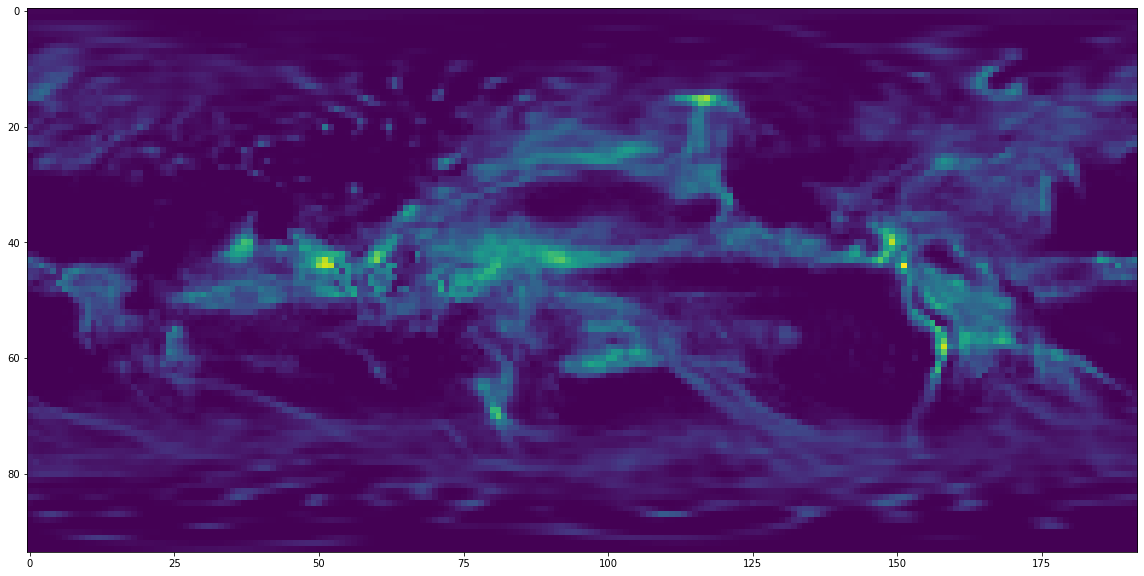

In [30]:
from matplotlib.pyplot import figure
fig = figure(figsize=(20,10))
plot_prate = lhtflyear[3,:,:]
plt.imshow(plot_prate)
tep = monname[0]

/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:479: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:479: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min
/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:480: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:503: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


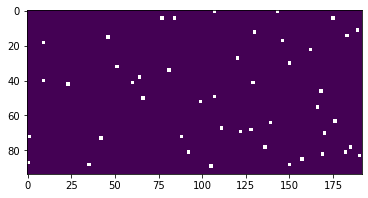

In [45]:
plt.imshow(climate[7,:])

In [9]:
for x in month:
    # 範囲指定用の文字列構成
    start1 = str(year) + '-' + str(x) + '-1'
    end1 = str(year) + '-' + str(x) + '-10'
    start2 = str(year) + '-' + str(x) + '-11'
    end2 = str(year) + '-' + str(x) + '-20'
    start3 = str(year) + '-' + str(x) + '-21'
    
    if x == 12:
        nextmonth = 1
        lastday = str(year+1) + '-' + str(nextmonth) + '-1'
    else:
        nextmonth = x + 1
        lastday = str(year) + '-' + str(nextmonth) + '-1'

    end3 = datetime.datetime.strptime(lastday,'%Y-%m-%d') - datetime.timedelta(days = 1)
    end3 = end3.strftime('%Y-%m-%d')
    # print(end3)
    data_mean_10dy1 = data.loc[start1:end1].mean(dim='time')
    data_mean_10dy2 = data.loc[start2:end2].mean(dim='time')
    data_mean_10dy3 = data.loc[start3:end3].mean(dim='time')

    # 月毎に10日区切りで3つ作ったら保存用の配列に代入
    hoge = np.vstack((np.vstack((data_mean_10dy1,data_mean_10dy2)),data_mean_10dy3)) # これは1ヶ月分
    print(end3)

#print(data_mean_10dy1.shape)
#print(data_mean_10dy2)
#print(data_mean_10dy3)

2017-01-31
2017-02-28
2017-03-31
2017-04-30
2017-05-31
2017-06-30
2017-07-31
2017-08-31
2017-09-30
2017-10-31
2017-11-30
2017-12-31


In [5]:

# datatimeindexを使って月とか週、曜日でも平均取れる
key = data['time'].dt.month
data.groupby(key).mean(dim='time')

<xarray.DataArray 'dlwrf' (month: 12, lat: 94, lon: 192)>
array([[[155.33871 , 154.30646 , 153.30646 , ..., 156.95967 ,
         156.41936 , 155.89516 ],
        [155.46774 , 155.75807 , 156.1129  , ..., 154.75807 ,
         154.75807 , 155.01613 ],
        [155.79033 , 157.29033 , 158.90323 , ..., 152.75    ,
         153.30646 , 154.2742  ],
        ...,
        [122.91936 , 126.32258 , 129.75    , ..., 115.008064,
         117.508064, 120.09677 ],
        [121.120964, 122.94355 , 124.66129 , ..., 117.41936 ,
         118.491936, 119.758064],
        [119.064514, 118.76613 , 118.30645 , ..., 120.435486,
         119.80645 , 119.30645 ]],

       [[148.21428 , 147.94643 , 147.64285 , ..., 150.27678 ,
         149.55357 , 148.90178 ],
        [150.14285 , 150.79465 , 151.33928 , ..., 149.64285 ,
         149.74107 , 149.94643 ],
        [153.23215 , 154.73215 , 156.125   , ..., 150.25893 ,
         151.13393 , 152.125   ],
...
        [ 89.683334,  93.86667 ,  98.325   , ...,  78.958336,
          82.316666,  85.85833 ],
        [ 94.125   ,  96.308334,  98.46667 , ...,  88.875   ,
          90.46667 ,  92.21667 ],
        [ 99.15833 ,  98.99167 ,  98.48333 , ..., 100.15833 ,
          99.725   ,  99.425   ]],

       [[163.92741 , 162.79033 , 161.59677 , ..., 167.25    ,
         166.32259 , 165.15323 ],
        [178.60484 , 178.65323 , 178.5242  , ..., 178.43549 ,
         178.69354 , 178.7258  ],
        [192.48387 , 193.64516 , 194.70161 , ..., 188.84677 ,
         190.26613 , 191.4758  ],
        ...,
        [120.048386, 124.935486, 130.04033 , ..., 109.52419 ,
         112.83064 , 116.379036],
        [122.451614, 125.314514, 128.21774 , ..., 116.96774 ,
         118.645164, 120.47581 ],
        [125.82258 , 126.258064, 126.46774 , ..., 125.97581 ,
         125.8629  , 125.798386]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/akaz/anaconda3/lib/python3.8/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


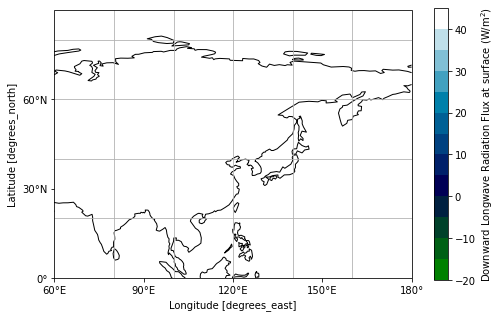

In [6]:
clevels = np.arange(-20,50,5) # 塗りつぶし用

# 描画
fig = plt.figure(figsize=(8,5))

# PlateCaree: 正距円筒図法, central_longitude: 図の中心の経度
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=180))

# (2) 図を描く
data_mean_10dy.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),levels=clevels,cmap='ocean',cbar_kwargs={'label':'Downward Longwave Radiation Flux at surface (W/m$^{2}$)'})
# transform = にはデータ自身の座標系を指定する; 大抵の場合ccrs.PlateCarree()としておけば問題ない

# (3) 目盛り
xticks = np.arange(13)*30
yticks = -90 + np.arange(7)*30
ax.set_xticks(xticks,crs=ccrs.PlateCarree())
ax.set_yticks(yticks,crs=ccrs.PlateCarree())
##　地図投影用の書式を設定
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)


# (4) 描画領域の設定
ax.set_extent([60,180,0,210],crs=ccrs.PlateCarree())


# (5) オプション
ax.coastlines() #海岸線
ax.gridlines(draw_labels=False) #罫線：ラベルはすでに上で描いたので"False"

plt.show()

In [7]:
ncfile = '01_ESTOC_ForcingData/NCEP_NCAR_Forcing/NCEP/dlwrf.sfc.gauss.1949.nc'
nc2 = xr.open_dataset(ncfile)
print(nc2)

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 365)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1949-01-01 1949-01-02 ... 1949-12-31
Data variables:
    dlwrf    (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (1949)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 99/05/29 by Hoop (netCDF2.3)\nConverted to chunke...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1
